In [1]:
from numpy import sin,cos,pi
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
#inline

In [3]:
def alpha_l(l,lambda_var,L):
    k=pi*np.arange(0,L)/L
    sum_var=sin(k)*sin(l*k)/((cos(k)-lambda_var)**2+sin(k)**2)
    sum_var=-1.0* sum_var/4.0/L
    sum_var=np.sum(sum_var)
    return sum_var

In [2]:
def alpha_l_theor_big_lambda(lambda_var,l): #lambda_var is greater than 1
    x= lambda_var**(-l-1)
    x=-x/8.0
    return x

def alpha_l_theor_small_lambda(lambda_var,l): #lambda_var is smaller than 1
    x= lambda_var**(l-1)
    x=-x/8.0
    return x

In [101]:
L=14
lambda_var=2.0
l_arr=np.arange(1,L)# string of length L is ignored
alpha_arr=np.zeros(len(l_arr))
for i in range(len(l_arr)):
    alpha_arr[i]=alpha_l(l_arr[i],lambda_var,L)

In [65]:
def error(x1,x2,L):
    return np.abs(np.sum(x1**2-x2**2)/(L-1))

In [148]:
lambda_var=2.0
L=1
L_arr=np.zeros(20)
err_arr=np.zeros(20)
for j in range(20):
    L_arr[j]=L
    l_arr=np.arange(1,L)
    alpha_arr=np.zeros(len(l_arr))
    for i in range(len(l_arr)):
        alpha_arr[i]=alpha_l(l_arr[i],lambda_var,L)
    x1=alpha_arr
    x2=alpha_l_theor_big_lambda(lambda_var,l_arr)
    L=L+1
    err_arr[j]=error(x1,x2,L)
    print L_arr[j].astype(int),err_arr[j]

1 0.0
2 0.00017578125
3 6.44029313114e-05
4 1.92883765409e-05
5 5.35425621212e-06
6 1.43137844738e-06
7 3.74712515197e-07
8 9.68609963411e-08
9 2.48354855048e-08
10 6.33300712613e-09
11 1.60864893792e-09
12 4.07453679997e-10
13 1.02982788056e-10
14 2.59855631217e-11
15 6.54836187414e-12
16 1.6484591513e-12
17 4.14622570807e-13
18 1.04212911928e-13
19 2.6177879922e-14
20 6.57252516287e-15


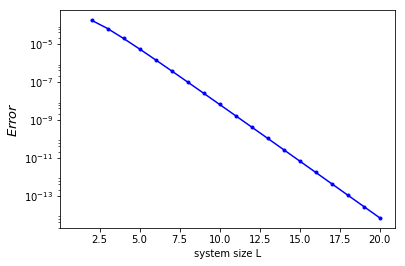

In [149]:
plt.semilogy(L_arr.astype(int), err_arr, 'b.-')
plt.xlabel("system size L")
#plt.title("L=14")
plt.ylabel(r"$Error$", fontsize=13)
#plt.legend(loc='best')
plt.savefig("error_alpha.eps")

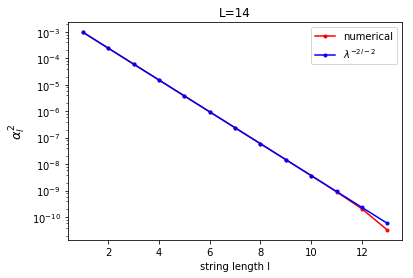

In [115]:
plt.semilogy(l_arr, alpha_arr**2, 'r.-', label='numerical')
plt.semilogy(l_arr, alpha_l_theor_big_lambda(lambda_var,l_arr)**2, 'b.-', label=r'$\lambda^{-2l-2}$')
plt.legend(loc='best')
plt.xlabel("string length l")
plt.title("L=14")
plt.ylabel(r"$\alpha_l^2$", fontsize=13)
plt.savefig("alpha_num_theoret.eps")

In [100]:
print alpha_l_theor_big_lambda(lambda_var,l_arr)[-1]**2- alpha_arr[-1]**2
print alpha_l_theor_big_lambda(lambda_var,l_arr)[-2]**2- alpha_arr[-2]**2

2.54658514058e-11
2.81943342303e-11


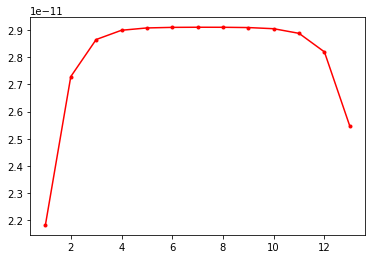

In [95]:
plt.plot(l_arr, np.abs(alpha_arr**2-alpha_l_theor_big_lambda(lambda_var,l_arr)**2), 'r.-')
#plt.semilogy(l_arr, , 'b.-')

### Norm of gauge potential: comparing it with ED method

In [2]:
x1,y1,w1,z1=np.loadtxt("v2_mu1e-10_int_L_scaling.dat",unpack=True,skiprows=2 )

In [7]:
def alpha_l(l,lambda_var,L):
    k=pi*np.arange(0,L)/L
    sum_var=sin(k)*sin(l*k)/((cos(k)-lambda_var)**2+sin(k)**2)
    sum_var=-1.0* sum_var/4.0/L
    sum_var=np.sum(sum_var)
    return sum_var

def norm_gauge(L, lambda_var):
    l_arr=np.arange(1,L)# string of length L is ignored
    alpha_arr=np.zeros(len(l_arr))
    for i in range(len(l_arr)):
        alpha_arr[i]=alpha_l(l_arr[i],lambda_var,L)
    return 2*np.sum((L*np.ones(L-1)-l_arr)*alpha_arr**2)  

def alpha_l_theor_big_lambda(lambda_var,l): #lambda_var is greater than 1
    x= lambda_var**(-l-1)
    x=-x/8.0
    return x

def norm_gauge_GP(L, lambda_var):
    l_arr=np.arange(1,L)# string of length L is ignored
    alpha_arr=alpha_l_theor_big_lambda(lambda_var,l_arr)
    return 2*np.sum((L*np.ones(L-1)-l_arr)*alpha_arr**2)

In [8]:
L=2
L_tot=13
L_arr=np.zeros(L_tot)
norm_arr=np.zeros(L_tot)
norm_GP_arr=np.zeros(L_tot)
lambda_var=5.0
for i in range(L_tot):
    L_arr[i]=L
    norm_arr[i]=norm_gauge(L, lambda_var)
    norm_GP_arr[i]=norm_gauge_GP(L, lambda_var)
    print L_arr[i], norm_arr[i],norm_GP_arr[i]
    L=L+1

2.0 4.62278106509e-05 5e-05
3.0 0.00010153645225 0.000102
4.0 0.000154042527551 0.00015408
5.0 0.000206160687777 0.0002061632
6.0 0.000258246376738 0.000258246528
7.0 0.000310329852629 0.00031032986112
8.0 0.000362413193991 0.000362413194445
9.0 0.000414496527754 0.000414496527778
10.0 0.00046657986111 0.000466579861111
11.0 0.000518663194444 0.000518663194444
12.0 0.000570746527778 0.000570746527778
13.0 0.000622829861111 0.000622829861111
14.0 0.000674913194444 0.000674913194444


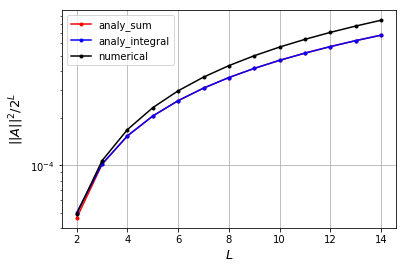

In [77]:
plt.semilogy(L_arr, norm_arr, 'r.-', label='analy_sum')
plt.semilogy(L_arr, norm_GP_arr, 'b.-', label='analy_integral')
plt.semilogy(x1,y1, 'k.-', label='numerical')
plt.grid()
#plt.title(r"$\mu=10^{-10}$")
plt.ylabel(r"$||A||^2/2^L$", fontsize=13)
plt.xlabel(r"$L$", fontsize=13)
plt.legend(loc='best')
plt.savefig("OBC_int_comparing_num_anal_norm_L_scaling.eps")

In [69]:
x1,y1,w1,z1=np.loadtxt("v2_mu1e-10_int_L_scaling.dat",unpack=True,skiprows=2 )
x3,y3,w3,z3=np.loadtxt("v2_mu1e-30_int_L_scaling.dat",unpack=True,skiprows=2 )

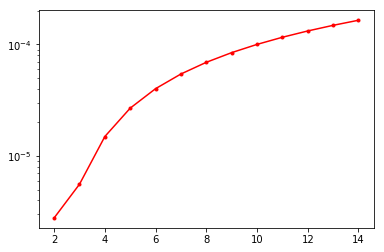

In [16]:
plt.semilogy(L_arr, y1-norm_arr, 'r.-', label='analy')

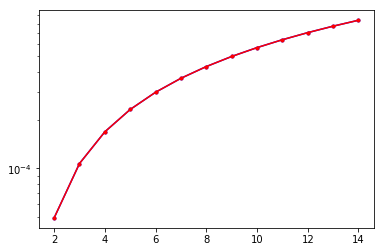

In [49]:
plt.semilogy(x1,y1, 'b.-')
plt.semilogy(x3,y3, 'r.-')

In [51]:
print  np.abs(y3-y1)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


### integrable model: periodic boundary condition

In [2]:
x2,y2,w2,z2=np.loadtxt("PBC_v2_mu1e-10_int_L_scaling.dat",unpack=True,skiprows=2 )

In [38]:
def alpha_l(l,lambda_var,L):
    k=pi*np.arange(0,L)/L
    sum_var=sin(k)*sin(l*k)/((cos(k)-lambda_var)**2+sin(k)**2)
    sum_var=-1.0* sum_var/4.0/L
    sum_var=np.sum(sum_var)
    return sum_var

def norm_gauge_pbc(L, lambda_var):
    l_arr=np.arange(1,L+1)# string of length L is ignored
    alpha_arr=np.zeros(len(l_arr))
    for i in range(len(l_arr)): #L-1 times it runs
        alpha_arr[i]=alpha_l(l_arr[i],lambda_var,L)
    return 2*L*np.sum(alpha_arr**2)

def norm_gauge_GP_PBC(L, lambda_var):
    l_arr=np.arange(1,L+1)# string of length L is ignored
    alpha_arr=alpha_l_theor_big_lambda(lambda_var,l_arr)
    return 2*L*np.sum(alpha_arr**2)

In [68]:
def alpha_l_del_campo(l,lambda_var,L):
    k=pi*np.arange(1,L,2)/L #will run till L-1
    sum_var=sin(k)*sin(l*k)/((cos(k)-lambda_var)**2+sin(k)**2)
    sum_var=-1.0* sum_var/2.0/L
    sum_var=np.sum(sum_var)
    return sum_var

def norm_gauge_pbc_del_campo(L, lambda_var):
    l_arr=np.arange(1,L/2.)# string of length L is ignored
    alpha_arr=np.zeros(len(l_arr))
    for i in range(len(l_arr)): #L-1 times it runs
        alpha_arr[i]=alpha_l(l_arr[i],lambda_var,L)
    return 2*L*(np.sum(alpha_arr**2) +  0.25*alpha_l_del_campo(L/2.,lambda_var,L)**2)

def norm_gauge_GP_PBC_del_campo(L, lambda_var):
    l_arr=np.arange(1,L/2.)# string of length L is ignored
    alpha_arr=alpha_l_theor_big_lambda(lambda_var,l_arr)
    return 2*L*(np.sum(alpha_arr**2)+  0.25*alpha_l_theor_big_lambda(lambda_var,L/2.)**2)

In [92]:
L=2
L_tot=7
L_arr=np.zeros(L_tot)
norm_arr_pbc_del_campo=np.zeros(L_tot)
norm_GP_PBC_arr_del_campo=np.zeros(L_tot)
lambda_var=5.0
for i in range(L_tot):
    L_arr[i]=L
    norm_arr_pbc_del_campo[i]=norm_gauge_pbc_del_campo(L, lambda_var)
    norm_GP_PBC_arr_del_campo[i]=norm_gauge_GP_PBC_del_campo(L, lambda_var)
    print L_arr[i], norm_arr_pbc_del_campo[i],norm_GP_PBC_arr_del_campo[i]
    L=L+1

2.0 9.24556213018e-05 2.5e-05
3.0 0.000220401202451 0.0001575
4.0 0.000207949886001 0.000202
5.0 0.000259997888575 0.0002605
6.0 0.000312479818242 0.00031212
7.0 0.000365937990541 0.000364588
8.0 0.000416665599481 0.0004166464


In [29]:
print L, np.arange(1,L+1)

15 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


In [23]:
L=2
L_tot=13
L_arr=np.zeros(L_tot)
norm_arr_pbc=np.zeros(L_tot)
norm_GP_PBC_arr=np.zeros(L_tot)
lambda_var=5.0
for i in range(L_tot):
    L_arr[i]=L
    print L_arr[i], alpha_l(L,lambda_var,L)
    L=L+1

2.0 -1.17754499918e-18
3.0 -8.4172637994e-19
4.0 -1.55377320002e-18
5.0 -1.60305454173e-18
6.0 -2.20792416666e-18
7.0 -2.36031843423e-18
8.0 -2.89876268882e-18
9.0 -3.09917731266e-18
10.0 -3.59821745204e-18
11.0 -3.82793176983e-18
12.0 -5.37589725569e-18
13.0 -3.52801616056e-18
14.0 -6.55636879659e-18


In [106]:
L=2
L_tot=9
L_arr=np.zeros(L_tot)
norm_arr_pbc=np.zeros(L_tot)
norm_GP_PBC_arr=np.zeros(L_tot)
lambda_var=5.0
for i in range(L_tot):
    L_arr[i]=L
    norm_arr_pbc[i]=norm_gauge_pbc(L, lambda_var)
    norm_GP_PBC_arr[i]=norm_gauge_GP_PBC(L, lambda_var)
    print L_arr[i], norm_arr_pbc[i],norm_GP_PBC_arr[i], x2[i], y2[i]
    L=L+1

2.0 9.24556213018e-05 0.000104 2.0 0.000184911242604
3.0 0.000155069832303 0.00015624 3.0 0.000155069832303
4.0 0.000208244799511 0.0002083328 4.0 0.000208244799511
5.0 0.000260410959999 0.00026041664 5.0 0.000260410959999
6.0 0.00031249966464 0.00031249999872 6.0 0.00031249966464
7.0 0.000364583314816 0.000364583333274 7.0 0.000364583314816
8.0 0.000416666665689 0.000416666666664 8.0 0.000416666665689
9.0 0.00046874999995 0.00046875 9.0 0.000468749999951
10.0 0.000520833333331 0.000520833333333 10.0 0.000520833333331


In [25]:
print x2[1:],y2[1:]/x2[1:]

[  3.   4.   5.   6.   7.   8.   9.  10.] [  5.16899441e-05   5.20611999e-05   5.20821920e-05   5.20832774e-05
   5.20833307e-05   5.20833332e-05   5.20833333e-05   5.20833333e-05]


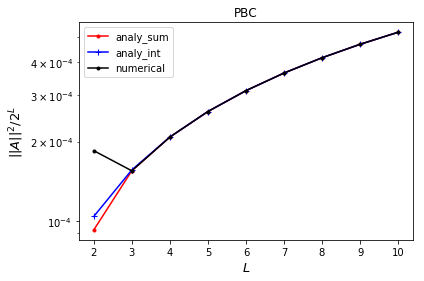

In [107]:
plt.semilogy(L_arr, norm_arr_pbc, 'r.-', label='analy_sum')
plt.semilogy(L_arr,norm_GP_PBC_arr, 'b+-', label='analy_int')
plt.plot(x2,y2, 'k.-', label='numerical')
#plt.grid()
plt.title(r"PBC")
plt.ylabel(r"$||A||^2/2^L$", fontsize=13)
plt.xlabel(r"$L$", fontsize=13)
plt.legend(loc='best')
#plt.savefig("PBC_int_comparing_num_anal_norm_L_scaling.eps")

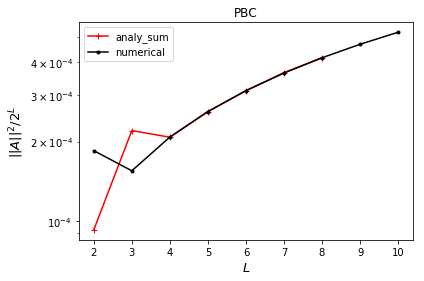

In [93]:
plt.semilogy(L_arr, norm_arr_pbc_del_campo, 'r+-', label='analy_sum')
#plt.semilogy(L_arr,norm_GP_PBC_arr_del_campo, 'b+-', label='analy_int')
plt.plot(x2,y2, 'k.-', label='numerical')
#plt.grid()
plt.title(r"PBC")
plt.ylabel(r"$||A||^2/2^L$", fontsize=13)
plt.xlabel(r"$L$", fontsize=13)
plt.legend(loc='best')
#plt.savefig("PBC_int_comparing_num_anal_norm_L_scaling.eps")

In [ ]:
plt.semilogy(L_arr, norm_arr_pbc, 'r.-', label='analy_sum')
plt.semilogy(L_arr,norm_GP_PBC_arr, 'b+-', label='analy_int')
plt.plot(x2,y2, 'k.-', label='numerical')
#plt.grid()
plt.title(r"PBC")
plt.ylabel(r"$||A||^2/2^L$", fontsize=13)
plt.xlabel(r"$L$", fontsize=13)
plt.legend(loc='best')
#plt.savefig("PBC_int_comparing_num_anal_norm_L_scaling.eps")

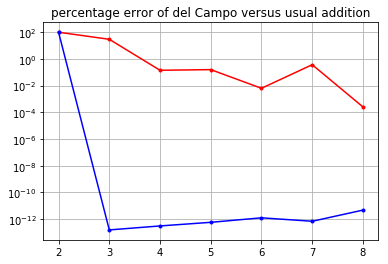

In [116]:
plt.semilogy(L_arr[0:7], 100*np.abs(y2[0:7]-norm_arr_pbc_del_campo[0:7])/norm_arr_pbc_del_campo[0:7], 'r.-')
plt.semilogy(L_arr[0:7], 100*np.abs(y2[0:7]-norm_arr_pbc[0:7])/norm_arr_pbc[0:7], 'b.-')
plt.grid()
plt.title('percentage error of del Campo versus usual addition')

### Scaling of $\mu^2$ for gauge potential

In [3]:
def alpha_l(l,lambda_var,L,mu):
    k=pi*np.arange(0,L)/L
    sum_var=sin(k)*sin(l*k)/((cos(k)-lambda_var)**2+sin(k)**2+ mu**2)
    sum_var=-1.0* sum_var/4.0/L
    sum_var=np.sum(sum_var)
    return sum_var

def norm_gauge_pbc(L, lambda_var,mu):
    l_arr=np.arange(1,L)# string of length L is ignored
    alpha_arr=np.zeros(len(l_arr))
    for i in range(len(l_arr)): #L-1 times it runs
        alpha_arr[i]=alpha_l(l_arr[i],lambda_var,L,mu)
    return 2*L*np.sum(alpha_arr**2)

def norm_gauge_GP_PBC(L, lambda_var):
    l_arr=np.arange(1,L)# string of length L is ignored
    alpha_arr=alpha_l_theor_big_lambda(lambda_var,l_arr)
    return 2*L*np.sum(alpha_arr**2)

In [5]:
mutot=100
lambda_var=5.0
mu=np.logspace(-5,5,mutot)
norm_mu_arr_L8=np.zeros(mutot)
L=8
for i in range(mutot):
    norm_mu_arr_L8[i]=norm_gauge_pbc(L, lambda_var,mu[i])    

In [6]:
mutot=100
mu=np.logspace(-5,5,mutot)
norm_mu_arr_L10=np.zeros(mutot)
L=10
for i in range(mutot):
    norm_mu_arr_L10[i]=norm_gauge_pbc(L, lambda_var,mu[i])   

In [14]:
x_L8,y_L8=np.loadtxt("v3_PBC_L8_int_mu_scaling.dat",unpack=True,skiprows=3)
x_L10,y_L10=np.loadtxt("v3_PBC_L10_int_mu_scaling.dat",unpack=True,skiprows=3)

<IPython.core.display.Javascript object>


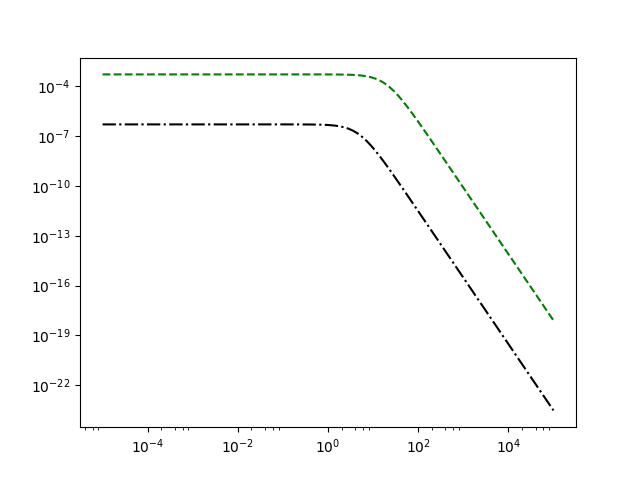

In [19]:
#plt.loglog(mu, norm_mu_arr_L8/2**8, 'r-.')
#plt.loglog(x_L8, y_L8/2**8, 'b--')
plt.loglog(mu, norm_mu_arr_L10/2**10, 'k-.')
plt.loglog(x_L10, y_L10/2**10, 'g--')

In [16]:
x=np.logspace(-10,10,100)
def lorentz(x):
    return 1./(10+ x**2)**2

def ETH_guess(x):
    return 1./(x*(10.+ x)**3)

<IPython.core.display.Javascript object>


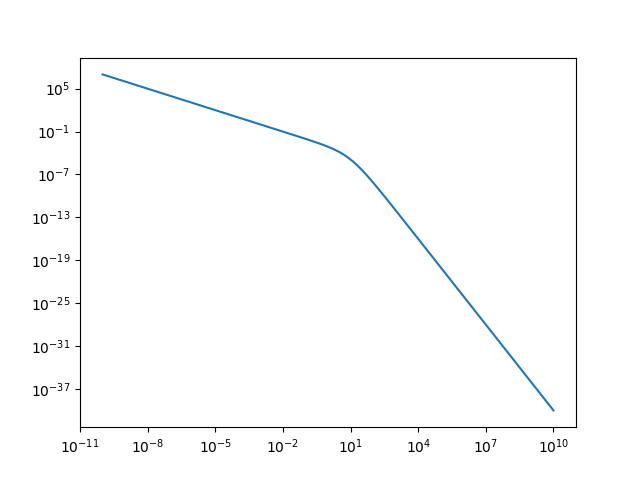

In [22]:
#plt.loglog(x, lorentz(x))
plt.loglog(x, ETH_guess(x))

<IPython.core.display.Javascript object>


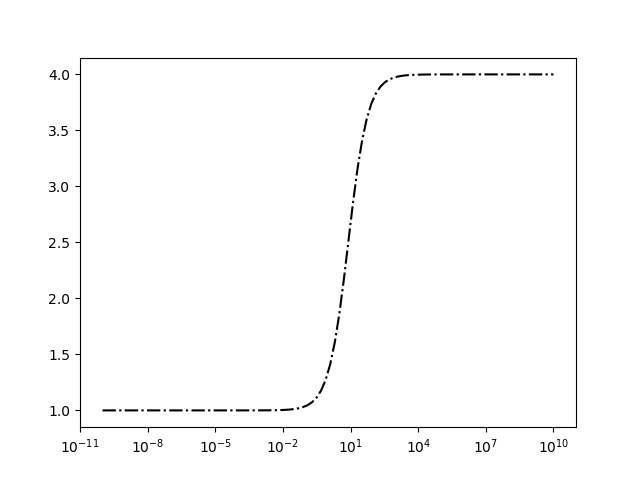

In [23]:
#plt.semilogx(x,-1*(log_deriv(lorentz(x),x)),'k-.')
plt.semilogx(x,-1*(log_deriv(ETH_guess(x),x)),'k-.')

In [2]:
def log_deriv(y,x):
    dy = np.zeros(len(y),np.float)
    dy[0:-1] = np.diff(np.log(y))/np.diff(np.log(x))
    dy[-1] = dy[-2]#(np.log(y[-1]) - np.log(y[-2]))/(np.log(x[-1]) - np.log(x[-2])) #last two elements are same
    return dy

<IPython.core.display.Javascript object>


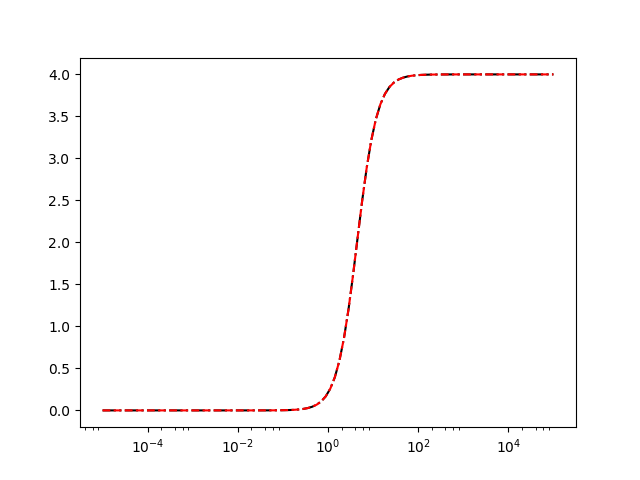

In [20]:
plt.semilogx(mu,-1*(log_deriv(norm_mu_arr_L8/2**8,mu)),'k-.', label='int, L=8')
plt.semilogx(mu,-1*(log_deriv(norm_mu_arr_L10/2**10,mu)), 'r--', label='int, L=10')

<IPython.core.display.Javascript object>


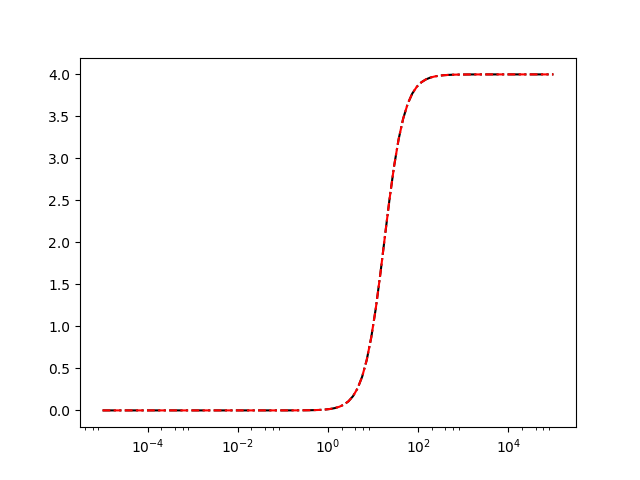

In [21]:
plt.semilogx(x_L8,-1*(log_deriv(y_L8/2**8,x_L8)),'k-.', label='int, L=8')
plt.semilogx(x_L10,-1*(log_deriv(y_L10/2**10,x_L10)), 'r--', label='int, L=10')

In [46]:
alpha2= 16*(1+25.0)
norm=2*64.0/alpha2**2
print norm/2**2
print y2[0]

0.000184911242604
0.000184911242604


We find that PBC result matches with analytical results. But not the open boundary condition one. Why is that?

###  L=2 open boundary case integrable case

In [71]:
alpha2= 4*(1+4*25.0)
norm=8.0/alpha2**2
print norm
print y1[0]
print 100*(norm-y1[0])/y1[0]
print 100*(norm-y1[0])/norm

4.90148024703e-05
4.90148024703e-05
6.91246647595e-14
6.91246647595e-14


In [7]:
from quspin.operators import hamiltonian # Hamiltonians and operators
from quspin.basis import spin_basis_1d # Hilbert space spin basis
def Ham_int_antiferro(L,hz):
    basis = spin_basis_1d(L)
    J=1.0
    hz_arr = [[hz,i] for i in range(L)] # OBC
    J_arr =[[J,i,(i+1)] for i in range(L-1)] # OBC# [[J,i,(i+1)%L] for i in range(L)] # PBC 
    # static and dynamic lists
    static = [["zz",J_arr],["x",hz_arr]]
    dynamic =[]
    H = hamiltonian(static,dynamic,basis=basis,dtype=np.float_,check_symm=False,check_herm=False)
    return H


def del_lambda_Ham(L):
    basis = spin_basis_1d(L)  
    hx_lamb=1.0
    hx_lamb_arr = [[hx_lamb,i] for i in range(L)] 
    static_lamb = [["x",hx_lamb_arr]]
    dynamic_lamb =[]
    op_lamb=hamiltonian(static_lamb,dynamic_lamb,basis=basis,dtype=np.float_,check_symm=False,check_herm=False)
    return op_lamb

def output_gauge_potent(Ham,L):
    E,V= Ham.eigh()
    V_mat=np.matrix(V)
    V_mat_H=V_mat.H
    op_lamb_mat = np.matrix(del_lambda_Ham(L).toarray())
    num_lamb_mat =  (V_mat_H)*(op_lamb_mat*V_mat) #matrix multiplication
    wij = np.outer(E,np.ones(2**L))-np.outer(np.ones(2**L),E)
    return wij, num_lamb_mat
  
def gauge_potent_mu(wij,num_lamb_mat,mu):
    A_lamb = -1j*np.multiply(wij,num_lamb_mat)/(wij**2+ mu**2)#element-wise multiplication
    return A_lamb

def norm(A_lamb):    
    return np.linalg.norm(A_lamb, 'fro')

In [13]:
L=2
print del_lambda_Ham(L)

static mat: 
  (0, 1)	1.0
  (0, 2)	1.0
  (1, 0)	1.0
  (1, 3)	1.0
  (2, 0)	1.0
  (2, 3)	1.0
  (3, 1)	1.0
  (3, 2)	1.0


dynamic:



In [16]:
L=2
hz=5.0
Ham=Ham_int_antiferro(L,hz)
E,V= Ham.eigh()
V_mat=np.matrix(V)
V_mat_H=V_mat.H
op_lamb_mat = np.matrix(del_lambda_Ham(L).toarray())
num_lamb_mat =  (V_mat_H)*(op_lamb_mat*V_mat) #matrix multiplication
print E

[-10.04987562  -1.           1.          10.04987562]


In [9]:
print num_lamb_mat

[[ -1.99007438e+00   1.05354039e-16   2.12326412e-15   1.99007438e-01]
 [  1.11022302e-16   0.00000000e+00  -9.86076132e-32  -1.11022302e-16]
 [  1.99840144e-15  -9.86076132e-32  -2.36658272e-30  -4.44089210e-16]
 [  1.99007438e-01  -1.16414903e-16  -4.74251964e-16   1.99007438e+00]]


In [12]:
mu=1e-30
wij, num_lamb_mat=output_gauge_potent(Ham,L)
A_lamb=gauge_potent_mu(wij, num_lamb_mat,mu)
print norm(A_lamb)**2/2**L

4.90148024703e-05


In [52]:
mu=1e-30
wij, num_lamb_mat=output_gauge_potent(Ham,L)
print num_lamb_mat
#print wij.item(1)
#print np.multiply(wij,num_lamb_mat)/(wij**2+ mu**2)
a=np.multiply(wij,num_lamb_mat)/(wij**2+ mu**2)

[[ -1.99007438e+00   1.05354039e-16   2.12326412e-15   1.99007438e-01]
 [  1.11022302e-16   0.00000000e+00  -9.86076132e-32  -1.11022302e-16]
 [  1.99840144e-15  -9.86076132e-32  -2.36658272e-30  -4.44089210e-16]
 [  1.99007438e-01  -1.16414903e-16  -4.74251964e-16   1.99007438e+00]]
-9.04987562112


In [62]:
x=np.zeros(16)
for i in range(16):
    if (i ==0) or (i==5) or (i==10) or (i==15):
        print i, wij.item(i)
    else:
        print num_lamb_mat.item(i)/wij.item(i)
        x[i]=num_lamb_mat.item(i)/wij.item(i)

0 0.0
-1.1641490314e-17
-1.92152761599e-16
-0.00990099009901
1.22678263338e-17
5 0.0
4.93038065763e-32
1.00473802846e-17
1.80852845122e-16
-4.93038065763e-32
10 0.0
4.90713053353e-17
0.00990099009901
-1.05354039386e-17
-5.24042521499e-17
15 0.0


In [66]:
print np.sum(x**2)/4.0

4.90148024703e-05


### Checking results with Dries's code
It matches very well with it!

In [73]:
norm_nonint_dries=[0.076796,0.37295,0.58748,2.3833,4.5438,12.521,61.188,431.04,3976.4,3428.1,7124.2,14951,44376]

In [77]:
L_arr=np.arange(2,15)

In [76]:
len(norm_nonint_dries), len(L_arr)

(13, 12)

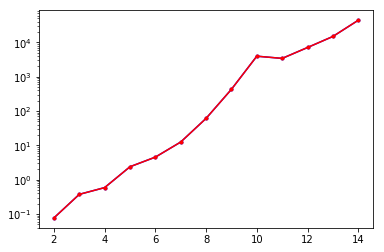

In [85]:
plt.semilogy(L_arr, norm_nonint_dries, 'b.-')
plt.semilogy(x1, y1, 'r.-')

In [84]:
x1,y1,w1,z1=np.loadtxt("v2_mu1e-10_nonint_L_scaling.dat",unpack=True,skiprows=2 )
#x3,y3,w3,z3=np.loadtxt("v2_mu1e-30_int_L_scaling.dat",unpack=True,skiprows=2 )

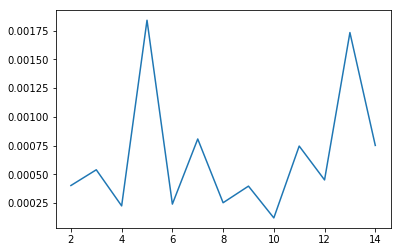

In [95]:
plt.plot(x1, 100*np.abs(y1-norm_nonint_dries)/y1) #percentage error

In [92]:
y1[-1], norm_nonint_dries[-1]

(44375.666785039481, 44376)

In [94]:
100*(y1[-1]-norm_nonint_dries[-1])/y1[-1]

-0.00075089567021838406